# Machine Learning with Python

## 1.2 Data

To get started, let's get hold of some data.

### [Toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html)

We have some small demonstration datasets immediately available in `sklearn.datasets`:

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

type(iris)

sklearn.utils._bunch.Bunch

The data is returned as a `Bunch` object. This is similar to a dictionary, but also allows values to be referenced as attributes.

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris["filename"]

'iris.csv'

In [5]:
iris.filename

'iris.csv'

Notice that the `data` and the `target` are provided separately as numpy arrays. Each row is an observation (i.e. a data point) and each column is a variable.

In [6]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Use the `DESCR` attribute to find out more about the dataset.

In [9]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Splitting testing from training data

Before we even look at the data, it is good practice to split off a test dataset that will remain unseen until we are ready for final evaluation of our models.

sklearn has a convenient function `train_test_split` that will create a randomised 75%:25% split of training:testing data. The `X` values are the features and the `y` values are the target.

Notice that we can "seed" the random number generator to create deterministic output - this can be helpful during code development as it means our results will not change between runs.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

### Visualising data

Before we start, it is good practice to take a look at the general form of the data to identify any inconsistencies or errors.

We can use the `scatter_matrix` from pandas to create a pairwise matrix of scatter plots together with histograms for the individual features.



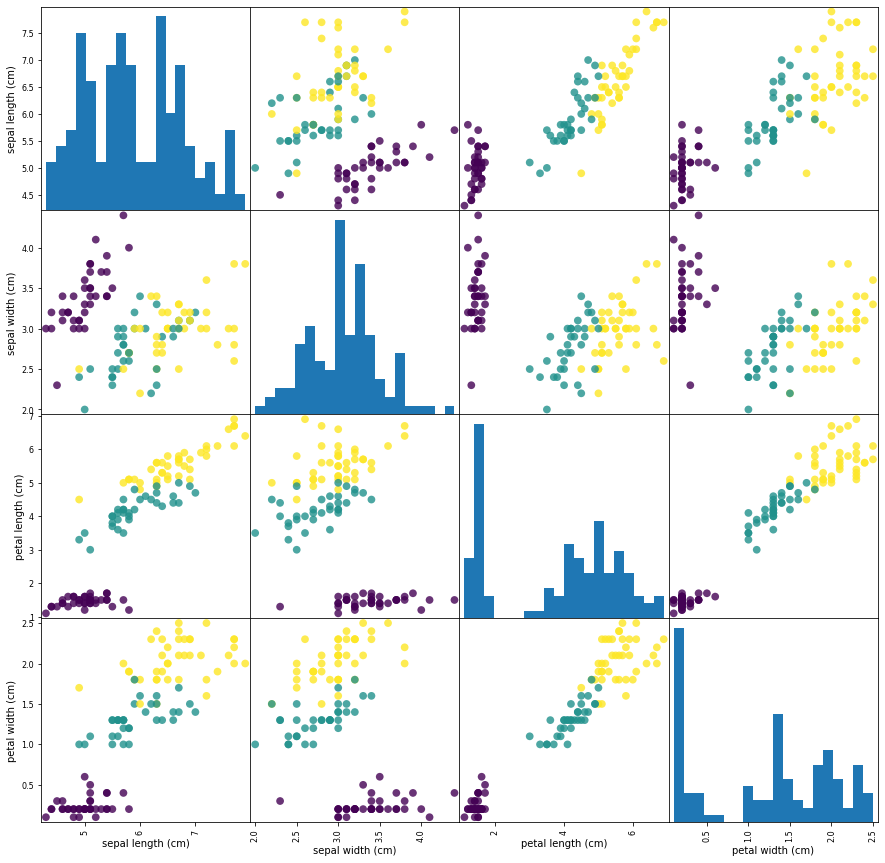

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris.feature_names)

# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(
    iris_dataframe,
    c=y_train,
    figsize=(15, 15),
    marker="o",
    hist_kwds={"bins": 20},
    s=60,
    alpha=0.8,
)

plt.show()


### [Real-world datasets](https://scikit-learn.org/stable/datasets/real_world.html)

In addition to the toy data, scikit-learn has loader functions for some commonly used larger sets. For example, the [Olivetti faces](https://scikit-learn.org/stable/datasets/real_world.html#the-olivetti-faces-dataset) dataset.


In [12]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()


In [13]:
olivetti.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [14]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [15]:
olivetti.data[0]

array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

In [16]:
olivetti.images[0]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083, 0.3305785 ,
        0.30578512],
       [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083, 0.338843  ,
        0.3140496 ],
       [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528, 0.338843  ,
        0.29752067],
       ...,
       [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256, 0.16528925,
        0.17355372],
       [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033, 0.16115703,
        0.16528925],
       [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256, 0.16115703,
        0.1570248 ]], dtype=float32)

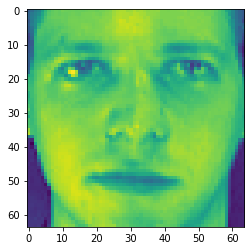

In [17]:
plt.imshow(olivetti.images[0])
plt.show()

### [Data generators](https://scikit-learn.org/stable/datasets/sample_generators.html)

Sometimes we want to generate synthetic data to test clustering and regression methods. scikit-learn provides a number of helpful functions to do this for us.

For example, we can create a classification dataset consisting of a number of blobs:


In [18]:
from sklearn.datasets import make_blobs

# 100 data points, 2 features, 3 blobs
blobs_X, blobs_y = make_blobs(100, 2, centers=3)

# split off a test dataset
X_train, X_test, y_train, y_test = train_test_split(blobs_X, blobs_y, random_state=0)

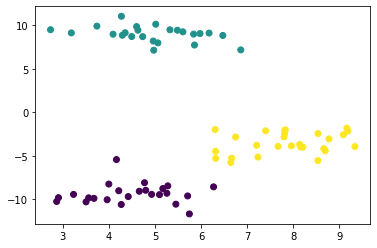

In [19]:
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.show()

### [external datasets](https://scikit-learn.org/stable/datasets/loading_other_datasets.html#loading-from-external-datasets)

There are of course many other sources of data that we might want to use.

scikit-learn provides a direct interface to the [OpenML](https://www.openml.org/home) repository, so it is very easy to make use of these datasets in your work. See [here](https://scikit-learn.org/stable/datasets/loading_other_datasets.html#downloading-datasets-from-the-openml-org-repository) for more details.



In [20]:
from sklearn.datasets import fetch_openml

mice = fetch_openml(name='miceprotein', version=4)

mice.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

To load data from a CSV file, we would use the pandas functions:

In [21]:
!pwd

/home/snowztail/Repositories/learn-python/machine-learning-with-python/notebooks


In [22]:
codon = pd.read_csv("../assets/codon_usage.csv")

/tmp/ipykernel_209540/3980380675.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  codon = pd.read_csv("../assets/codon_usage.csv")


In [23]:
codon.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [24]:
# Extract a DataFrame for the features
codon_X = codon.iloc[:,5:]

codon_X

,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,0.03555,0.01459,0.03920,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,0.01258,0.03096,0.06386,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,0.01068,0.02728,0.06643,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,0.03964,0.01600,0.02082,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [25]:
# Extract a Series for the target
codon_y = codon.iloc[:,0]

codon_y

0        vrl
1        vrl
2        vrl
3        vrl
4        vrl
        ... 
13023    pri
13024    pri
13025    pri
13026    pri
13027    pri
Name: Kingdom, Length: 13028, dtype: object

In [26]:
# We can now work in scikit-learn with these pandas objects 
# in exactly the same way as for the numpy arrays
X_train, X_test, y_train, y_test = train_test_split(codon_X, codon_y, random_state=0)

### Other data resources

Some other repositories you may find useful:

https://paperswithcode.com/datasets

https://archive.ics.uci.edu/ml/index.php


### Preprocessing

There may be several preprocessing steps that we need to complete before data is ready to use in our chosen method. Below are a few processes that are commonly applied.

Importantly, note that the any transformations of the features (e.g. imputation or standardisation discussed below) should be calculated on the *training* data only, after which the same transformation is applied to both the training and testing data. 

If we were to fit to the *entire* data set, after transformation our testing data would be contaminated with information from the training data, which is what we want to avoid.

Consider the following table of features describing some students:

* Age
* Subject of current degree course
* Level of current degree course
* Height


In [27]:
import numpy as np

X_train = pd.DataFrame(
    [
        [25, "Chemistry", "PhD", 1.50],
        [32, "Physics", "MSc", 1.67],
        [20, "Mathematics", "BSc", 1.69],
        [22, "Mathematics", "PhD", 1.58],
        [np.nan, "Physics", "PhD", 1.70],
        [25, "Physics", "PhD", 1.82],
        [np.nan, "Mathematics", "BSc", 1.49],
        [19, "Chemistry", "BSc", 1.80],
    ],
    columns=["age", "subject", "level", "height"],
)

X_train


,age,subject,level,height
0,25.0,Chemistry,PhD,1.50
1,32.0,Physics,MSc,1.67
2,20.0,Mathematics,BSc,1.69
3,22.0,Mathematics,PhD,1.58
4,NaN,Physics,PhD,1.70
5,25.0,Physics,PhD,1.82
6,NaN,Mathematics,BSc,1.49
7,19.0,Chemistry,BSc,1.80


#### [Encoding categorical features](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)

Categorical datatypes need to be transformed to numbers before scikit-learn can use them as features.

For binary features and features whose categories have a natural ordering, this can be done by assigning an integer value to each category. This is called *ordinal encoding*.

The feature `level` has a natural ordering, so we can use the `OrdinalEncoder` to encode it:

In [28]:
# extract the level column as a pandas DataFrame
level = X_train[["level"]]

level

,level
0,PhD
1,MSc
2,BSc
3,PhD
4,PhD
5,PhD
6,BSc
7,BSc


In [29]:
from sklearn.preprocessing import OrdinalEncoder

# we provide the ordered categories to the encoder
enc = OrdinalEncoder(categories=[["BSc","MSc","PhD"]])

# fit the encoder to the data
enc.fit(level)

# encode the data
level_enc = enc.transform(level)

print(level_enc)

[[2.]
 [1.]
 [0.]
 [2.]
 [2.]
 [2.]
 [0.]
 [0.]]


In [30]:
# make a copy of the original DataFrame
X_train_enc = X_train.copy()

# replace the "level" column with the encoded version
X_train_enc["level"] = level_enc

X_train_enc

,age,subject,level,height
0,25.0,Chemistry,2.0,1.50
1,32.0,Physics,1.0,1.67
2,20.0,Mathematics,0.0,1.69
3,22.0,Mathematics,2.0,1.58
4,NaN,Physics,2.0,1.70
5,25.0,Physics,2.0,1.82
6,NaN,Mathematics,0.0,1.49
7,19.0,Chemistry,0.0,1.80


Although ordinal encoding is suitable for many categorical features, it may produce poor performance when the data type is nominal, i.e. where no meaningful ordering exists for the allowed values.

A better solution in these cases is to use *one-hot encoding* to replace a single integer feature with multiple binary features.

We will use a `OneHotEncoder` to encode the `subject` feature:

In [31]:
# extract the subject column as a pandas DataFrame
subject = X_train[["subject"]]  

subject

,subject
0,Chemistry
1,Physics
2,Mathematics
3,Mathematics
4,Physics
5,Physics
6,Mathematics
7,Chemistry


In [32]:
from sklearn.preprocessing import OneHotEncoder

#setting sparse=False means that enc.transform() will return an array
enc = OneHotEncoder( sparse=False )
# enc = OneHotEncoder( sparse=True )

# fit the encoder to the data
enc.fit(subject)

# encode the data
subject_enc = enc.transform(subject)

print(subject_enc)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [33]:
new_columns = pd.DataFrame( subject_enc, columns= "subject_" + enc.categories_[0] )

new_columns

,subject_Chemistry,subject_Mathematics,subject_Physics
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0
6,0.0,1.0,0.0
7,1.0,0.0,0.0


In [34]:
# remove the original "subject" feature and add the new features
X_train_enc = X_train_enc.drop("subject",axis=1).join(new_columns)

X_train_enc

,age,level,height,subject_Chemistry,subject_Mathematics,subject_Physics
0,25.0,2.0,1.50,1.0,0.0,0.0
1,32.0,1.0,1.67,0.0,0.0,1.0
2,20.0,0.0,1.69,0.0,1.0,0.0
3,22.0,2.0,1.58,0.0,1.0,0.0
4,NaN,2.0,1.70,0.0,0.0,1.0
5,25.0,2.0,1.82,0.0,0.0,1.0
6,NaN,0.0,1.49,0.0,1.0,0.0
7,19.0,0.0,1.80,1.0,0.0,0.0


#### [Imputation of missing values](https://scikit-learn.org/stable/modules/impute.html)

Real-world datasets often contain missing values, represented in data as `"?"` or `np.nan`.

We might choose to ignore (drop) rows that contain missing values. However, this wastes the rest of the information in that row.

It may be more desirable to insert a guess in place of the missing values. scikit-learn provides a couple of methods to do this.

The simplest approach is to use the mean of the column values in place of any unknown value:

In [35]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer()
imp.fit(X_train_enc)
X_imp = imp.transform(X_train_enc)

X_imp

array([[25.        ,  2.        ,  1.5       ,  1.        ,  0.        ,
         0.        ],
       [32.        ,  1.        ,  1.67      ,  0.        ,  0.        ,
         1.        ],
       [20.        ,  0.        ,  1.69      ,  0.        ,  1.        ,
         0.        ],
       [22.        ,  2.        ,  1.58      ,  0.        ,  1.        ,
         0.        ],
       [23.83333333,  2.        ,  1.7       ,  0.        ,  0.        ,
         1.        ],
       [25.        ,  2.        ,  1.82      ,  0.        ,  0.        ,
         1.        ],
       [23.83333333,  0.        ,  1.49      ,  0.        ,  1.        ,
         0.        ],
       [19.        ,  0.        ,  1.8       ,  1.        ,  0.        ,
         0.        ]])

A more sophisticated approach uses iterative regression modelling to try to guess the unknown values, based on the other features seen in that row:

In [36]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer()
imp.fit(X_train_enc)
X_imp = imp.transform(X_train_enc)

X_imp

array([[25.        ,  2.        ,  1.5       ,  1.        ,  0.        ,
         0.        ],
       [32.        ,  1.        ,  1.67      ,  0.        ,  0.        ,
         1.        ],
       [20.        ,  0.        ,  1.69      ,  0.        ,  1.        ,
         0.        ],
       [22.        ,  2.        ,  1.58      ,  0.        ,  1.        ,
         0.        ],
       [25.85982131,  2.        ,  1.7       ,  0.        ,  0.        ,
         1.        ],
       [25.        ,  2.        ,  1.82      ,  0.        ,  0.        ,
         1.        ],
       [22.06957989,  0.        ,  1.49      ,  0.        ,  1.        ,
         0.        ],
       [19.        ,  0.        ,  1.8       ,  1.        ,  0.        ,
         0.        ]])

#### [Standardisation](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)

Once we have encoded categorical features and imputed any missing values, it may be necessary to center the data and transform it so that all features have equal variance. This is a requirement for some machine learning methods to operate correctly.
 

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_imp)

X_scaled = scaler.transform(X_imp)

X_scaled

array([[ 0.29517009,  0.94387981, -1.34114305,  1.73205081, -0.77459667,
        -0.77459667],
       [ 2.11748914, -0.13483997,  0.11802059, -0.57735027, -0.77459667,
         1.29099445],
       [-1.00648637, -1.21355975,  0.2896869 , -0.57735027,  1.29099445,
        -0.77459667],
       [-0.48582379,  0.94387981, -0.65447781, -0.57735027,  1.29099445,
        -0.77459667],
       [ 0.51900848,  0.94387981,  0.37552005, -0.57735027, -0.77459667,
         1.29099445],
       [ 0.29517009,  0.94387981,  1.40551791, -0.57735027, -0.77459667,
         1.29099445],
       [-0.46770997, -1.21355975, -1.4269762 , -0.57735027,  1.29099445,
        -0.77459667],
       [-1.26681767, -1.21355975,  1.2338516 ,  1.73205081, -0.77459667,
        -0.77459667]])

Each feature in the scaled data has zero mean and unit variance:

In [38]:
X_scaled.mean( axis=0 )

array([-3.05311332e-16,  1.38777878e-17,  2.77555756e-17, -5.55111512e-17,
       -2.77555756e-17, -2.77555756e-17])

In [39]:
X_scaled.var( axis=0 )

array([1., 1., 1., 1., 1., 1.])

Note that this basic type of standardisation will cause problems for sparse data sets and data containing outlier values - there are other functions that implement alternative scaling procedures recommended for these cases.

### Exercise 

Download the `autoMpg` dataset from OpenML:

In [40]:
from sklearn.datasets import fetch_openml
mpg = fetch_openml(name='autoMpg',version=1)
type(mpg)

sklearn.utils._bunch.Bunch

See https://www.openml.org/d/196 for a description of the data.

Separate the data into training and testing sets.

In [41]:
mpg.DESCR

'**Author**:   \n**Source**: Unknown -   \n**Please cite**:   \n\n!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\n\n Identifier attribute deleted.\n\n As used by Kilpatrick, D. & Cameron-Jones, M. (1998). Numeric prediction\n using instance-based learning with encoding length selection. In Progress\n in Connectionist-Based Information Systems. Singapore: Springer-Verlag.\n\n !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\n\n\n 1. Title: Auto-Mpg Data\n \n 2. Sources:\n    (a) Origin:  This dataset was taken from the StatLib library which is\n                 maintained at Carnegie Mellon University. The dataset was \n                 used in the 1983 American Statistical Association Exposition.\n    (c) Date: July 7, 1993\n \n 3. Past Usage:\n     -  See 2b (above)\n     -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.\n        In Proceedings on the Tenth International Conference of Machine \n        Learni

In [42]:
mpg.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [43]:
mpg.data

,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1
394,4,97.0,52.0,2130.0,24.6,82,2
395,4,135.0,84.0,2295.0,11.6,82,1
396,4,120.0,79.0,2625.0,18.6,82,1


In [44]:
mpg.target

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: class, Length: 398, dtype: float64

In [45]:
mpg.target_names

['class']

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mpg.data, mpg.target, random_state=0)

The `origin` feature is a nominal value coded as an integer.
Use one-hot encoding to turn this column into multiple binary features.

In [47]:
print(type(X_train.origin))
print(type(X_train[["origin"]]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [48]:
from sklearn.preprocessing import OneHotEncoder

# origin = X_train.origin
origin = X_train[["origin"]]

enc = OneHotEncoder(sparse=False)
enc.fit(origin)

origin_enc = enc.transform(origin)

print(origin_enc)


[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1.

In [49]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model,origin
254,6,200.0,85.0,2965.0,15.8,78,1
246,4,78.0,52.0,1985.0,19.4,78,3
282,4,140.0,88.0,2890.0,17.3,79,1
81,4,97.0,92.0,2288.0,17.0,72,3
347,4,85.0,65.0,1975.0,19.4,81,3
...,...,...,...,...,...,...,...
323,4,156.0,105.0,2800.0,14.4,80,1
192,6,250.0,105.0,3353.0,14.5,76,1
117,4,68.0,49.0,1867.0,19.5,73,2
47,6,250.0,100.0,3282.0,15.0,71,1


In [54]:
X_train_enc = X_train.copy()

# Specify one-hot encoder index for dataframe
new_columns = pd.DataFrame(origin_enc, index=X_train.index, columns="origin_" + enc.categories_[0])
new_columns


,origin_1,origin_2,origin_3
254,1.0,0.0,0.0
246,0.0,0.0,1.0
282,1.0,0.0,0.0
81,0.0,0.0,1.0
347,0.0,0.0,1.0
...,...,...,...
323,1.0,0.0,0.0
192,1.0,0.0,0.0
117,0.0,1.0,0.0
47,1.0,0.0,0.0


In [55]:
# axis=1 specifies a column
X_train_enc = X_train_enc.drop("origin",axis=1).join(new_columns)
X_train_enc

,cylinders,displacement,horsepower,weight,acceleration,model,origin_1,origin_2,origin_3
254,6,200.0,85.0,2965.0,15.8,78,1.0,0.0,0.0
246,4,78.0,52.0,1985.0,19.4,78,0.0,0.0,1.0
282,4,140.0,88.0,2890.0,17.3,79,1.0,0.0,0.0
81,4,97.0,92.0,2288.0,17.0,72,0.0,0.0,1.0
347,4,85.0,65.0,1975.0,19.4,81,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
323,4,156.0,105.0,2800.0,14.4,80,1.0,0.0,0.0
192,6,250.0,105.0,3353.0,14.5,76,1.0,0.0,0.0
117,4,68.0,49.0,1867.0,19.5,73,0.0,1.0,0.0
47,6,250.0,100.0,3282.0,15.0,71,1.0,0.0,0.0


The `horsepower` feature has 6 missing values. Can you impute them?

In [56]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer()
imp.fit(X_train_enc)
X_imp = imp.transform(X_train_enc)

X_imp

array([[  6., 200.,  85., ...,   1.,   0.,   0.],
       [  4.,  78.,  52., ...,   0.,   0.,   1.],
       [  4., 140.,  88., ...,   1.,   0.,   0.],
       ...,
       [  4.,  68.,  49., ...,   0.,   1.,   0.],
       [  6., 250., 100., ...,   1.,   0.,   0.],
       [  4.,  90.,  71., ...,   0.,   1.,   0.]])

Finally, standardise the dataset using `StandardScaler`.

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_imp)

X_scaled = scaler.transform(X_imp)

X_scaled

array([[ 0.31188164,  0.07178791, -0.52194253, ...,  0.78712465,
        -0.46510916, -0.50733023],
       [-0.85718413, -1.12295743, -1.42297132, ..., -1.27044681,
        -0.46510916,  1.97110271],
       [-0.85718413, -0.51579176, -0.44003082, ...,  0.78712465,
        -0.46510916, -0.50733023],
       ...,
       [-0.85718413, -1.22088737, -1.50488303, ..., -1.27044681,
         2.15003291, -0.50733023],
       [ 0.31188164,  0.56143764, -0.11238398, ...,  0.78712465,
        -0.46510916, -0.50733023],
       [-0.85718413, -1.00544149, -0.90419717, ..., -1.27044681,
         2.15003291, -0.50733023]])